# Principal Component Analysis with Cancer Data

In [376]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [377]:
df = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [378]:
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [379]:
df.shape

(699, 11)

In [380]:
df = df.drop('ID', axis=1)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [381]:
df.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [382]:
df[df['Bare Nuclei'].str.isdigit() == False]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [383]:
df['Bare Nuclei'].describe().transpose()

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [384]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [385]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'],errors='coerce')

In [386]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [387]:
sum(df['Bare Nuclei'].isnull())

16

In [388]:
df = df.fillna(1)

In [389]:
df = df.drop_duplicates()

In [390]:
df.shape

(457, 10)

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 457 non-null int64
Cell Size                      457 non-null int64
Cell Shape                     457 non-null int64
Marginal Adhesion              457 non-null int64
Single Epithelial Cell Size    457 non-null int64
Bare Nuclei                    457 non-null float64
Normal Nucleoli                457 non-null int64
Bland Chromatin                457 non-null int64
Mitoses                        457 non-null int64
Class                          457 non-null int64
dtypes: float64(1), int64(9)
memory usage: 39.3 KB


In [392]:
df.Class.value_counts()

4    238
2    219
Name: Class, dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [393]:
#sns.pairplot(df,diag_kind = 'kde', hue = 'Class')

In [394]:
df_corr = df.corr()
df_corr[df_corr > .50]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.572961,0.585051,NaN,NaN,0.505154,NaN,NaN,NaN,0.671929
Cell Size,0.572961,1.000000,0.876257,0.636158,0.686596,0.584168,0.710696,0.653571,NaN,0.754380
Cell Shape,0.585051,0.876257,1.000000,0.608572,0.645747,0.610110,0.685179,0.651476,NaN,0.755177
Marginal Adhesion,NaN,0.636158,0.608572,1.000000,0.523539,0.586841,0.608256,0.509574,NaN,0.618088
Single Epithelial Cell Size,NaN,0.686596,0.645747,0.523539,1.000000,NaN,0.550626,0.554593,NaN,0.600130
Bare Nuclei,0.505154,0.584168,0.610110,0.586841,NaN,1.000000,0.600113,NaN,NaN,0.756300
Normal Nucleoli,NaN,0.710696,0.685179,0.608256,0.550626,0.600113,1.000000,0.604270,NaN,0.704781
Bland Chromatin,NaN,0.653571,0.651476,0.509574,0.554593,NaN,0.604270,1.000000,NaN,0.636002
Mitoses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Class,0.671929,0.754380,0.755177,0.618088,0.600130,0.756300,0.704781,0.636002,NaN,1.000000


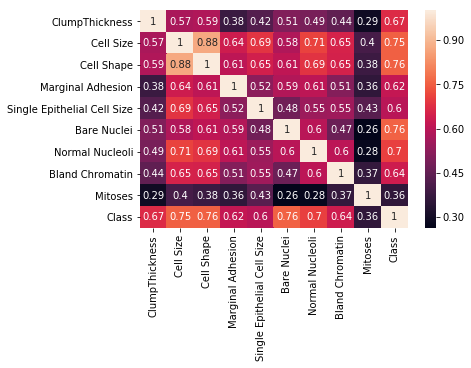

In [395]:
sns.heatmap(df_corr, annot=True)

In [396]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [397]:
#Let us check for pair plots

In [398]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [399]:
# We could see most of the outliers are now removed.

In [400]:
from scipy import stats

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 457 non-null int64
Cell Size                      457 non-null int64
Cell Shape                     457 non-null int64
Marginal Adhesion              457 non-null int64
Single Epithelial Cell Size    457 non-null int64
Bare Nuclei                    457 non-null float64
Normal Nucleoli                457 non-null int64
Bland Chromatin                457 non-null int64
Mitoses                        457 non-null int64
Class                          457 non-null int64
dtypes: float64(1), int64(9)
memory usage: 39.3 KB


In [402]:
df_score = stats.zscore(df)

In [403]:
df_score = abs(df_score)

In [405]:
index = df[df_score > 2.5].any(axis=1).index
index

Int64Index([ 43,  53,  62,  65,  68,  71,  71,  85,  85,  98,  98, 100, 104,
            104, 113, 117, 122, 129, 149, 167, 175, 187, 191, 201, 221, 229,
            236, 238, 261, 264, 268, 279, 286, 286, 302, 312, 344, 357, 357,
            360, 360, 400, 416, 421, 425, 482, 482, 608, 612, 648, 648, 689],
           dtype='int64')

In [406]:
df = df.drop(index=index)

In [407]:
df.shape

(414, 10)

In [332]:
# scale the dimensions of the data 

from sklearn.model_selection import train_test_split


X,y = df.iloc[:, :8] , df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5 , random_state=0)

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).trans

# Q6 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [333]:
from sklearn.decomposition import PCA
pca = PCA()   # we have two dimensions in input space, hence it will give two PCs by default...to get reduced dimensions we can
              # specify a number lower than what we have in input space.
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [334]:
print(pca.components_) 

[[ 0.29543508  0.39482263  0.39440144  0.34368593  0.3440722   0.32624066
   0.36640819  0.35225997]
 [ 0.60513256 -0.14376141 -0.06559169  0.11729003 -0.41604589  0.53685746
  -0.1316931  -0.34122548]
 [-0.66911545  0.04828321  0.03058815  0.58130202 -0.18211879  0.35328404
  -0.01299208 -0.23013021]
 [-0.05025032  0.45501744  0.44452987 -0.27832464 -0.41409958 -0.21981591
   0.33156954 -0.43084424]
 [-0.20233934 -0.08884393 -0.10884855 -0.51643878  0.4585797   0.51844572
   0.28795692 -0.33257785]
 [-0.00719215 -0.29329131 -0.35808353  0.06923986 -0.3350409  -0.0516737
   0.78350791  0.22826143]
 [ 0.23367468 -0.0578606  -0.17339271  0.42469835  0.42357043 -0.39722091
   0.19277056 -0.59771039]
 [ 0.02636897  0.71889827 -0.68663377 -0.02957229 -0.043758    0.05460641
  -0.06580645  0.03037077]]


In [335]:
print(pca.explained_variance_)

[5.16833444 0.72895254 0.56573218 0.43366564 0.38820617 0.33667632
 0.30120144 0.11606622]


In [460]:
X_pca = pca.transform(X_train_std)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (414, 8)
transformed shape: (207, 8)


# Content Based Recommendation System - Optional ( Q7 - Q15 will not be graded)

# Q7 Read the Dataset `movies_metadata.csv`

# Q8 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q9 Lets drop the null values in `description` column

# Q10 Keep the first occurance and drop duplicates of each title in column `title`

# Q11  As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q12  Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q13  Create cosine similarity matrix

# Q 14  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q15 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q16 Read the dataset(jokes.csv)

In [408]:
df1 =  pd.read_csv("jokes.csv")

In [409]:
df1.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [410]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [411]:
df1.shape

(24983, 101)

# Q17 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [412]:
ratings = df1.iloc[:200,1:]

In [413]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q18 Change the column indices from 0 to 99

In [414]:
ratings.columns = list(range(0,100))

In [415]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q19 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [416]:
ratings = ratings.replace(99.00,0)

In [417]:
ratings[ratings == 99.00].any(axis=1).sum()

0

# Q20 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [418]:
sc1 = StandardScaler()
ratings_diff = sc1.fit_transform(ratings)  # scale training and test data independently to prevent data leaks

### Popularity based recommendation system

# Q21  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [445]:
series = pd.Series(ratings_diff.mean(axis=0))

In [475]:
top10 = series.sort_values(ascending=False).head(10).index

In [477]:
list(top10)

[53, 20, 47, 49, 64, 99, 83, 23, 73, 13]